In [1]:
import scipy.stats as stats
from scipy.optimize import curve_fit
import ast
import matplotlib.pyplot as plt
import numpy as np
import math

In [87]:
alpha = 10

In [88]:
f = open(f"data2D{alpha}.txt","r")
lines = f.readlines()

In [89]:
histlist=[]
for item in lines:
    histlist.append(ast.literal_eval(item))

In [90]:
round(math.sqrt(len(histlist)))

164

In [91]:
histlist

[265.0,
 264.0,
 294.0,
 313.0,
 283.0,
 286.0,
 295.0,
 295.0,
 291.0,
 298.0,
 245.0,
 318.0,
 324.0,
 331.0,
 320.0,
 0.0,
 291.0,
 279.0,
 292.0,
 294.0,
 285.0,
 249.0,
 188.0,
 0.0,
 273.0,
 273.0,
 250.0,
 216.0,
 195.0,
 218.0,
 275.0,
 281.0,
 0.0,
 320.0,
 276.0,
 308.0,
 307.0,
 275.0,
 308.0,
 308.0,
 269.0,
 309.0,
 334.0,
 320.0,
 334.0,
 229.0,
 313.0,
 308.0,
 313.0,
 285.0,
 297.0,
 263.0,
 286.0,
 287.0,
 264.0,
 277.0,
 0.0,
 0.0,
 228.0,
 221.0,
 304.0,
 310.0,
 322.0,
 290.0,
 280.0,
 0.0,
 0.0,
 264.0,
 305.0,
 235.0,
 0.0,
 325.0,
 0.0,
 340.0,
 0.0,
 297.0,
 259.0,
 312.0,
 316.0,
 0.0,
 0.0,
 247.0,
 266.0,
 283.0,
 288.0,
 236.0,
 274.0,
 235.0,
 0.0,
 201.0,
 304.0,
 300.0,
 325.0,
 306.0,
 313.0,
 269.0,
 282.0,
 278.0,
 0.0,
 304.0,
 0.0,
 357.0,
 353.0,
 313.0,
 0.0,
 294.0,
 320.0,
 222.0,
 313.0,
 315.0,
 259.0,
 0.0,
 177.0,
 275.0,
 277.0,
 0.0,
 243.0,
 0.0,
 230.0,
 215.0,
 268.0,
 322.0,
 321.0,
 323.0,
 0.0,
 265.0,
 314.0,
 297.0,
 319.0,
 321.0,


In [92]:
for item in histlist:
    if item == 0.0:
        histlist.remove(item)
        
for item in histlist:
    if item == 0.0:
        histlist.remove(item)
        
for item in histlist:
    if item == 0.0:
        histlist.remove(item)

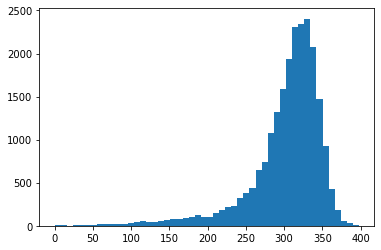

In [93]:
hist, bins, patches = plt.hist(histlist,bins=50);

In [94]:
x = np.zeros_like(hist.astype(float))
for i in range(1,len(bins)):
    x[i-1]=((bins[i]+bins[i-1])/2)
y = hist

In [95]:
x = x[20:]

In [96]:
y = y[20:]

In [97]:
len(histlist)

22687

In [98]:
len(x)

30

In [99]:
len(y)

30

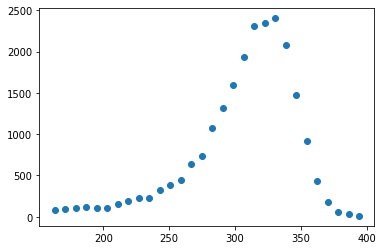

In [100]:
plt.scatter(x,y)

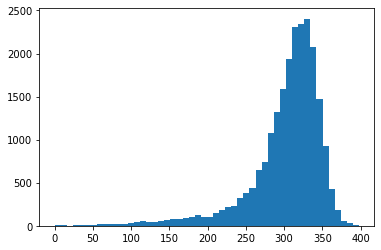

In [101]:
plt.hist(histlist, bins=50);

In [102]:
'''
def maxFit(x,a,b):
    return b * x**2 * np.exp(-x**2/(2*a**2)) / a**3

popt, pcov = curve_fit(maxFit,x,y,maxfev=10000)

'''

'\ndef maxFit(x,a,b):\n    return b * x**2 * np.exp(-x**2/(2*a**2)) / a**3\n\npopt, pcov = curve_fit(maxFit,x,y,maxfev=10000)\n\n'

(321.9631303686203, 32.15380504865411)


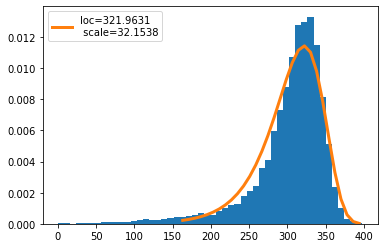

In [103]:
# GUMBEL FIT 

param = stats.gumbel_l.fit(histlist)
print(param)

plt.hist(histlist,bins=50,density=True)
plt.plot(x, stats.gumbel_l.pdf(x,*param), lw=3,label=f"loc={round(param[0],4)}\n scale={round(param[1],4)}")

plt.legend()

plt.savefig(f"histogram2D{alpha}_gumbel.png")
plt.show()

(-0.10476921883383888, 176.73060422406246)


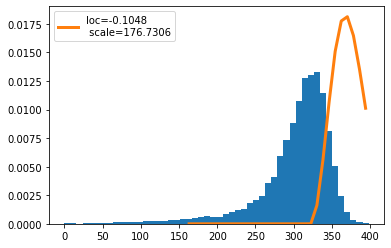

In [104]:
#MAXWELL FIT 

maxwell = stats.maxwell

params = maxwell.fit(histlist)
print(params)


#weights = np.ones_like(histlist) / len(histlist)
plt.hist(histlist,bins=50,density=True)# weights=weights)
plt.plot(x, maxwell.pdf(x,*param), lw=3,label=f"loc={round(params[0],4)}\n scale={round(params[1],4)}")

plt.legend()
plt.savefig(f"histogram2D{alpha}_maxwell.png")
plt.show()

(-0.06219695986131031, 5.013962035811457)


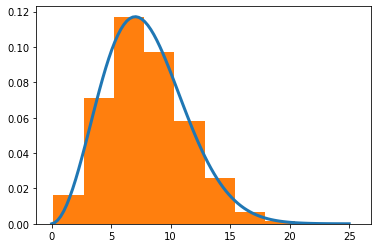

In [105]:
# WORKING EXAMPLE OF MAXWELL FIT 

maxwell = stats.maxwell
data = maxwell.rvs(loc=0, scale=5, size=10000)

params = maxwell.fit(data)
print(params)
# (0, 4.9808603062591041)

#plt.hist(data, bins=20)
xspace = np.linspace(0, 25, 100)
plt.plot(xspace, maxwell.pdf(xspace,*params), lw=3)
weights = np.ones_like(data) / len(data)
plt.hist(data,density=True) #weights=weights)
plt.show()

In [106]:
σ = 47
μ = 307

a = σ * np.sqrt(np.pi/(3.0*np.pi - 8.0))
print(a)

m = 2.0*a*np.sqrt(2.0/np.pi)
print(m) # as if loc=0

loc = μ - m
print(loc)

print("----------Now test--------------------")

# sampling
q = maxwell.rvs(loc=loc, scale=a, size=100000)

print(np.mean(q))
print(np.std(q))

69.79096445684834
111.37026604732166
195.62973395267835
----------Now test--------------------
307.02715752362866
46.9983367625042


In [107]:
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import random
import numpy as np
import scipy.optimize
from scipy.stats import maxwell

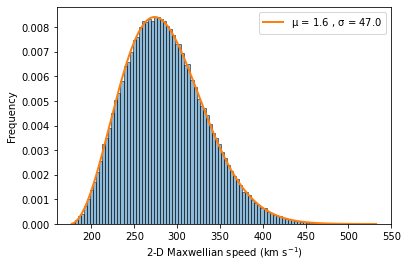

In [108]:
samplesize = 100000

mean = 307
sigma = 47
loc = 175 #my guess
a_value = np.sqrt((sigma**2 * math.pi)/(3*math.pi - 8)) #calculated based on wiki description

fig, axs = plt.subplots(1)
v_2d = maxwell.rvs(loc, a_value, size=samplesize) #array corresponding to 2D proper motion obtained from Hubbs
mean, var, skew, kurt = maxwell.stats(moments='mvsk')

N, bins, patches = plt.hist(v_2d, bins=100, density=True, alpha=0.5, histtype='bar', ec='black')
maxx = np.linspace(min(v_2d), max(v_2d), samplesize)

axs.plot(maxx, maxwell.pdf(maxx, loc, a_value), lw=2, label= r'$\mathdefault{\mu}$ = '+'{:0.1f}'.format(mean)+r' , '+r'$\mathdefault{\sigma}$ = '+'{:0.1f}'.format(sigma))

axs.set(xlabel=r'2-D Maxwellian speed (km s$^{-1}$)')
axs.set(ylabel='Frequency')
plt.legend(loc='upper right')

In [11]:
alpha = 30

In [12]:
f = open(f"activityTimes2D{alpha}.txt","r")
lines = f.readlines()

In [13]:
activityTimes=[]
for item in lines:
    activityTimes.append(ast.literal_eval(item))

In [14]:
len(activityTimes)

239

In [15]:
round(math.sqrt(len(activityTimes)))

15

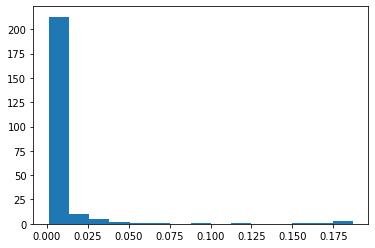

In [20]:
hist, bins, patches = plt.hist(activityTimes,bins=15);

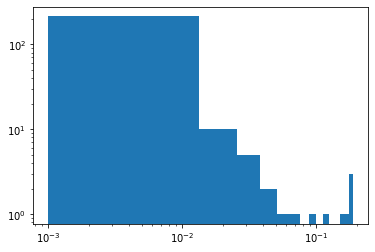

In [25]:
hist, bins, patches = plt.hist(activityTimes,bins=15);
plt.xscale('log')
plt.yscale('log')

In [2]:
alpha = 50

In [3]:
f = open(f"activityDifference2D{alpha}.txt","r")
lines = f.readlines()

In [4]:
activityTimes=[]
for item in lines:
    activityTimes.append(ast.literal_eval(item))

In [5]:
len(activityTimes)

2533

In [6]:
round(math.sqrt(len(activityTimes)))

50

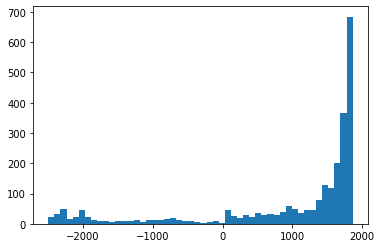

In [7]:
hist, bins, patches = plt.hist(activityTimes,bins=50);

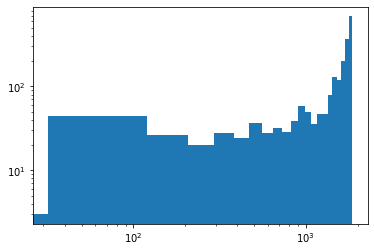

In [8]:
hist, bins, patches = plt.hist(activityTimes,bins=50);
plt.xscale('log')
plt.yscale('log')